### Life Expectancy (WHO)
#### Statistical Analysis on factors influencing Life Expectancy

### Context

Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.


### Content
The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.


### Inspiration
The data-set aims to answer the following key questions: 1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy? 2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan? 3. How does Infant and Adult mortality rates affect life expectancy? 4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc. 5. What is the impact of schooling on the lifespan of humans? 6. Does Life Expectancy have positive or negative relationship with drinking alcohol? 7. Do densely populated countries tend to have lower life expectancy? 8. What is the impact of Immunization coverage on life Expectancy?

### Life Expectancy Data.csv
325.63 KB

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in **this project we have considered data from year 2000-2015 for 193 countries for further analysis**. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. **Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP**. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. **The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables**. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.


- What social and economic factors contribute most significantly in determining life expectancy
at birth?
- Do factors that establish a higher standard of living necessarily lead to a longer lifespan?
- Can a model consisting of these significant factors be constructed to accurately forecast
life expectany?
- Does the decision which geeographic region we live in have a significant influence upon our
life expectancey?

In [375]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [376]:
life = pd.read_csv('Life Expectancy Data.csv')

# Data set

In [377]:
observations = life.shape[0]
features = life.shape[1]
print('Observations: ', observations)
print('Features: ', features ,'\n')
print(pd.DataFrame(life.dtypes, columns = ['Data Type']), '\n')

print('--- MISSING DATA----')
missing_data = life.isnull().apply(sum)
print(pd.DataFrame(missing_data, columns = ['Missing Data']))

Observations:  2938
Features:  22 

                                Data Type
Country                            object
Year                                int64
Status                             object
Life expectancy                   float64
Adult Mortality                   float64
infant deaths                       int64
Alcohol                           float64
percentage expenditure            float64
Hepatitis B                       float64
Measles                             int64
 BMI                              float64
under-five deaths                   int64
Polio                             float64
Total expenditure                 float64
Diphtheria                        float64
 HIV/AIDS                         float64
GDP                               float64
Population                        float64
 thinness  1-19 years             float64
 thinness 5-9 years               float64
Income composition of resources   float64
Schooling                         float6

### Column names have spaces, which should be repaced by a character thinness 1-19 years two white space after the word "thinness".

# Data Preperation

In [378]:
life.columns = map(lambda col_name: 
              col_name.strip().replace(' ', '_'), life.columns)

In [379]:
life.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [380]:
life = life.rename(index=str, columns={'thinness__1-19_years':'thinness_1-19_years'})

In [381]:
life.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Missing Data

In [382]:
def select_yearly_data(year, df):
    return df[df.Year == year]

def build_missing_df(temp, year):
    missing = pd.DataFrame(select_yearly_data(year, life).isnull().apply(sum), 
             columns = [str(year)])
    temp = pd.concat([temp, missing], axis =1)
    return temp

years = np.sort(life.Year.unique())

#total missing data adding to a dataframe
for year in years:
    total_missing = pd.DataFrame(life.isnull().apply(sum), columns=['total'])

temp = total_missing

for year in years:
    temp = build_missing_df(temp, year)
    
missing_data_by_year = temp

## Missing data for each features

In [383]:
missing_data_by_year

,total,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Year,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Status,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Life_expectancy,10,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0
Adult_Mortality,10,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0
infant_deaths,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Alcohol,194,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,177
percentage_expenditure,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Hepatitis_B,553,98,88,70,52,45,36,32,24,20,17,15,13,13,11,10,9
Measles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Summary Statistics

## Year-by-year

In [384]:
def yearly_summary(year, df = life, status = 'Developing'):
    
    life_year = select_yearly_data(year, df)
    data_series = life_year.Life_expectancy[life_year.Status == status]
    data_series = data_series.dropna()
    return float(round(np.mean(data_series), 1)), float(round(np.median(data_series), 1))

def get_eda(year, df = life):
        
    print('Year: ', year)
    life_year = select_yearly_data(year, df)
    plt.figure(1)
    developing = life_year.Life_expectancy[life_year.Status == 'Developing']
    developed = life_year.Life_expectancy[life_year.Status == 'Developed']
    
    developing = developing.dropna()
    developed = developed.dropna()
    
    
    
                 
    plt.subplot(221)
    
    n_bins = int(np.sqrt(len(developing)))
    plt.hist(developing, bins = n_bins, normed = True)
    
    n_bins = int(np.sqrt(len(developed)))
    plt.hist(developed, bins = n_bins, normed = True, alpha =0.7)
    plt.ylabel('Frequency')

    plt.subplot(223)
    sns.boxplot(y = 'Status', x = 'Life_expectancy', data = life_year) 
    #sns.swarmplot(y = 'Status', x = 'Life_expectancy', data = life_year, color = '0.25', alpha = 0.7)
    plt.ylabel('')
    plt.xlabel('Life Expectancy')

    x = np.sort(developing)
    y = np.arange(1, len(x) + 1) / len(x)

    plt.subplot(222)                              
    plt.plot(x, y, '.b')

    x = np.sort(developed)
    y = np.arange(1, len(x) + 1) / len(x)
    #plt.subplot(224)                              
    plt.plot(x, y, '.g')
    plt.ylabel('ECDF')
    plt.xlabel('Life Expectancy')
                                      
    plt.show()   

    print('MEAN')
    print('Developing: ', format(np.mean(developing), '.2f'))
    print('Developed: ', format(np.mean(developed), '.2f'))
    print('\n')

### Example 1: Year 2000

Year:  2000


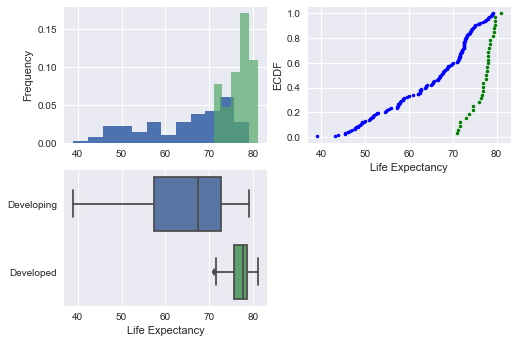

MEAN
Developing:  64.62
Developed:  76.80




In [385]:
 get_eda(2000)

### Example 2: Year 2005

Year:  2005


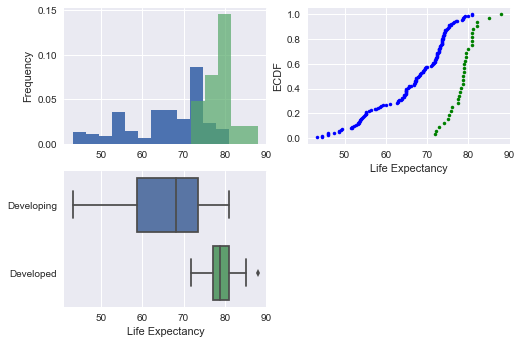

MEAN
Developing:  66.01
Developed:  78.59




In [386]:
get_eda(2005)

## Example 3: Year 2010

Year:  2010


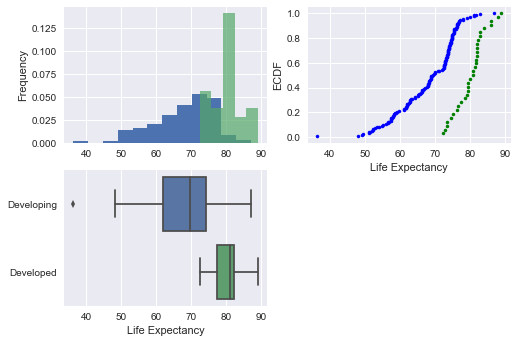

MEAN
Developing:  67.91
Developed:  80.15




In [387]:
get_eda(2010)

### Example 4: Year 2015

Year:  2015


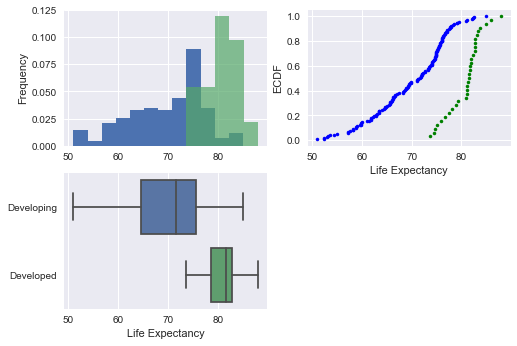

MEAN
Developing:  69.69
Developed:  80.71




In [388]:
get_eda(2015)

## Time Series of Life Expectancy: 2000 to 2015

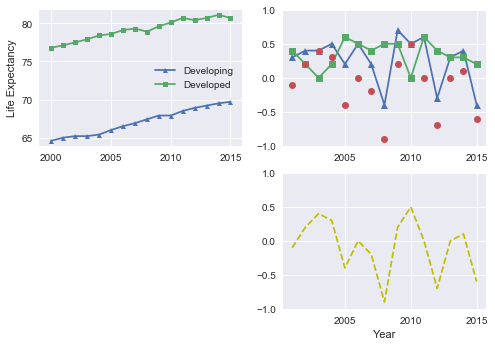

,Developed:Mean,Developing:Mean,Difference,Developed_Change,Developing_Change,Difference_Change
2000,76.8,64.6,12.2,,,
2001,77.1,65.0,12.1,0.3,0.4,-0.1
2002,77.5,65.2,12.3,0.4,0.2,0.2
2003,77.9,65.2,12.7,0.4,0,0.4
2004,78.4,65.4,13.0,0.5,0.2,0.3
2005,78.6,66.0,12.6,0.2,0.6,-0.4
2006,79.1,66.5,12.6,0.5,0.5,0
2007,79.3,66.9,12.4,0.2,0.4,-0.2
2008,78.9,67.4,11.5,-0.4,0.5,-0.9
2009,79.6,67.9,11.7,0.7,0.5,0.2


In [389]:
years = np.sort(life.Year.unique())
summary_df = pd.DataFrame(index = years, columns = ['Developed:Mean', 'Developing:Mean', 'Difference']) 

for year in years:
    #get_eda(year)
    mean_developing, median = yearly_summary(year, df = life, status = 'Developing')
    summary_df['Developing:Mean'][year] = mean_developing
    mean_developed, median = yearly_summary(year, df = life, status = 'Developed')
    summary_df['Developed:Mean'][year] = mean_developed
    summary_df['Difference'][year] = mean_developed - mean_developing

plt.subplot(221)
plt.plot(summary_df.index, summary_df['Developing:Mean'], '^-', markersize = 5)
plt.plot(summary_df.index, summary_df['Developed:Mean'], 's-', markersize = 5)
plt.xlim(1999, 2016)
plt.legend(['Developing', 'Developed'])
plt.margins(0.04)

plt.ylabel('Life Expectancy')

year_by_year_variations = summary_df.diff(axis = 0).astype(dtype = 'float').round(decimals = 1)
year_by_year_variations.columns = ['Developed_Change','Developing_Change','Difference_Change']

plt.subplot(222)
plt.plot(year_by_year_variations.index, year_by_year_variations.Developed_Change, '^-')
plt.plot(year_by_year_variations.index, year_by_year_variations.Developing_Change, 's-')
plt.plot(year_by_year_variations.index, year_by_year_variations.Difference_Change, 'o')
plt.ylim(-1, 1)

plt.subplot(224)
plt.plot(year_by_year_variations.index, year_by_year_variations.Difference_Change, '--y')
plt.xlabel('Year')
plt.ylim(-1, 1)

plt.show()

pd.concat([summary_df, year_by_year_variations], axis = 1).fillna('')

In [ ]:
# Questions:
# life_expectancy of people born in a country in a particular year